In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp
import psycopg2
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

C:\ProgramData\Anaconda3\envs\API\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\API\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\API\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\API\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Libraries imported


In [2]:
path1='D:/KIE Square Analytics Templates/PD'

In [3]:
df= pd.read_excel(path1+'/'+"ASO_Details_East_Fin_1.xlsx")

In [4]:
df.columns

Index(['Unnamed: 0', 'Sales_Region', 'District', 'Dealer_ID',
       'Bill_Qty_Monthly', 'Month', 'Dealer_Level', 'Total_Bill_Qty_Monthly',
       'Unnamed: 0.1', 'Discount', 'Total_Discount', 'Price_Support',
       'Discount/Bag', 'Total_Discount/Bag', 'Price_Support/Bag', 'ASO_ID',
       'Date', 'ASO_WSP', 'State', 'Bill_Price', 'Total_PD', 'Dist_WSP',
       'C-Dist_WSP', 'CD+QD', 'DF', 'CD+QD+DF'],
      dtype='object')

In [5]:
df1=df.copy()

In [6]:
df1.head()

,Unnamed: 0,Sales_Region,District,Dealer_ID,Bill_Qty_Monthly,Month,Dealer_Level,Total_Bill_Qty_Monthly,Unnamed: 0.1,Discount,...,Date,ASO_WSP,State,Bill_Price,Total_PD,Dist_WSP,C-Dist_WSP,CD+QD,DF,CD+QD+DF
0,0,EAST,KOLKATA,7001073,31.00,03'23,Titanium,685.50,5181,184783.277133,...,2023-03-06,345,West Bengal,385.0,15.0000,353.0,358.0,5.0,5.0,10
1,1,EAST,24 PRAGANA NORTH,7014916,10.00,01'23,Silver,110.40,17507,66305.208333,...,2023-01-17,380,West Bengal,400.0,25.0000,368.0,375.0,5.0,5.0,10
2,2,EAST,24 PRAGANA SOUTH,7001123,46.00,03'23,Platinum,408.15,5307,160099.881900,...,2023-03-22,360,West Bengal,380.0,5.0000,350.0,355.0,5.0,5.0,10
3,3,EAST,ANGUL,7015045,27.00,12'22,Gold,162.45,17644,157742.679400,...,2022-12-08,330,OD,360.0,20.0000,330.0,330.0,4.5,5.5,10
4,4,EAST,BALASORE,7028007,56.25,12'22,Titanium,445.30,26669,361101.067727,...,2022-12-22,325,OD,340.0,0.2094,320.0,325.0,4.5,5.5,10


In [7]:
df1.columns

Index(['Unnamed: 0', 'Sales_Region', 'District', 'Dealer_ID',
       'Bill_Qty_Monthly', 'Month', 'Dealer_Level', 'Total_Bill_Qty_Monthly',
       'Unnamed: 0.1', 'Discount', 'Total_Discount', 'Price_Support',
       'Discount/Bag', 'Total_Discount/Bag', 'Price_Support/Bag', 'ASO_ID',
       'Date', 'ASO_WSP', 'State', 'Bill_Price', 'Total_PD', 'Dist_WSP',
       'C-Dist_WSP', 'CD+QD', 'DF', 'CD+QD+DF'],
      dtype='object')

In [8]:
df1.drop(columns={'Unnamed: 0'}, inplace=True)

In [9]:
df2 = df1.groupby(['Sales_Region', 'State', 'District', 'Month', 'Dealer_Level'], as_index=False).apply(lambda group: pd.Series({
    'Record': group['Dealer_ID'].count(), 'Dealers_Counts': group['Dealer_ID'].nunique(),
    'ASOs_Counts': group['ASO_ID'].nunique(),
    'M_ASO_WSP': group['ASO_WSP'].mean(),
    'Discount/Bag': group['Discount/Bag'].mean(),
    # 'Bill_Qty_Monthly': group['Bill_Qty_Monthly'].mean(),
    'Total_Month_Bill_Qty': group['Total_Bill_Qty_Monthly'].mean(),
    # 'U_Bill_Price': group['M_Bill_Price'].mean(), 'U_Dist_WSP': group['M_Dist_WSP'].mean(),  
    # 'U_Total_PD': group['M_Total_PD'].mean(), 'U_C-Dist_WSP': group['M_C-Dist_WSP'].mean(),   
    'M_Bill_Price': group['Bill_Price'].mean(), 'M_Dist_WSP': group['Dist_WSP'].mean(),  
    'M_Total_PD': group['Total_PD'].mean(), 'M_C-Dist_WSP': group['C-Dist_WSP'].mean(),  
    'CD+QD': group['CD+QD'].mean(), 'DF': group['DF'].mean(), 'CD+QD+DF': group['CD+QD+DF'].mean()
}))

In [10]:
df2.columns

Index(['Sales_Region', 'State', 'District', 'Month', 'Dealer_Level', 'Record',
       'Dealers_Counts', 'ASOs_Counts', 'M_ASO_WSP', 'Discount/Bag',
       'Total_Month_Bill_Qty', 'M_Bill_Price', 'M_Dist_WSP', 'M_Total_PD',
       'M_C-Dist_WSP', 'CD+QD', 'DF', 'CD+QD+DF'],
      dtype='object')

In [11]:
# df1[(df1['District']=='UTTAR DINAJPUR') & (df1['Month']=="09'22") & (df1['Dealer_Level_Sales']=='Small')]['Total_PD'].unique()

In [12]:
# df2[(df2['District']=='UTTAR DINAJPUR') & (df2['Month']=="09'22") & (df2['Dealer_Levels']=='Small')]['M_Total_PD'].unique()

In [13]:
df2.head()

,Sales_Region,State,District,Month,Dealer_Level,Record,Dealers_Counts,ASOs_Counts,M_ASO_WSP,Discount/Bag,Total_Month_Bill_Qty,M_Bill_Price,M_Dist_WSP,M_Total_PD,M_C-Dist_WSP,CD+QD,DF,CD+QD+DF
0,EAST,Bihar,BHAGALPUR,03'23,Silver,1.0,1.0,1.0,360.0,168.767707,32.5,377.0000,352.5,0.0,372.5,0.0,10.0,10.0
1,EAST,Bihar,EAST CHAMPARAN,11'22,Silver,1.0,1.0,1.0,375.0,68.643542,48.5,415.0000,375.0,23.0,375.0,4.0,6.0,10.0
2,EAST,Bihar,GAYA,02'23,Gold,1.0,1.0,1.0,375.0,573.102229,263.5,403.8531,377.5,17.0,NaN,4.0,6.0,10.0
3,EAST,Bihar,GAYA,09'22,Bronze,1.0,1.0,1.0,330.0,485.092500,78.0,366.9514,332.5,0.0,NaN,4.0,6.0,10.0
4,EAST,Bihar,JAMUI,12'22,Gold,1.0,1.0,1.0,370.0,357.114766,96.5,399.6000,377.5,19.0,367.5,4.0,6.0,10.0


In [14]:
df2['Cushion_Avl']= df2['Discount/Bag']+df2['M_Total_PD']
df2['Post_PD_BP']= df2['M_Bill_Price']-df2['M_Total_PD']
df2['DDF_Actual']= df2['Post_PD_BP']-df2['M_ASO_WSP']
df2['DDF%']= df2['DDF_Actual']/df2['Discount/Bag']
# df2['Total_Month_Bill_Qty']= df2['Bill_Qty_Monthly']*df2['Dealers_Counts']

In [15]:
df2['DDF_Computed']=0.5*df2['Discount/Bag']

df2['BP-DDF']=df2['M_Bill_Price']-df2['DDF_Computed']
df2['PD_Ideal'] = np.where(df2['BP-DDF'] - df2['M_ASO_WSP'] > df2['M_Total_PD'], df2['M_Total_PD'], np.maximum(df2['BP-DDF'] - df2['M_ASO_WSP'], 0))
df2['PD_Ideal_2'] = np.where(df2['BP-DDF'] - df2['M_Dist_WSP'] > df2['M_Total_PD'], df2['M_Total_PD'], np.maximum(df2['BP-DDF'] - df2['M_Dist_WSP'], 0))
df2['Excess_PD']= df2['M_Total_PD']-df2['PD_Ideal']
df2['Savings']= df2['Total_Month_Bill_Qty']*20*df2['Excess_PD']
df2['Savings_2']= df2['Total_Month_Bill_Qty']*20*(df2['M_Total_PD']-df2['PD_Ideal_2'])

In [16]:
df2['Dealer_Level'].value_counts()

Gold        13
Platinum    10
Bronze       9
Silver       7
Titanium     5
No Tier      1
Mercury      1
Name: Dealer_Level, dtype: int64

In [17]:
df2.head()

,Sales_Region,State,District,Month,Dealer_Level,Record,Dealers_Counts,ASOs_Counts,M_ASO_WSP,Discount/Bag,...,Post_PD_BP,DDF_Actual,DDF%,DDF_Computed,BP-DDF,PD_Ideal,PD_Ideal_2,Excess_PD,Savings,Savings_2
0,EAST,Bihar,BHAGALPUR,03'23,Silver,1.0,1.0,1.0,360.0,168.767707,...,377.0000,17.0000,0.100730,84.383854,292.616146,0.000000,0.000000,0.000000,0.000000,0.000000
1,EAST,Bihar,EAST CHAMPARAN,11'22,Silver,1.0,1.0,1.0,375.0,68.643542,...,392.0000,17.0000,0.247656,34.321771,380.678229,5.678229,5.678229,17.321771,16802.117734,16802.117734
2,EAST,Bihar,GAYA,02'23,Gold,1.0,1.0,1.0,375.0,573.102229,...,386.8531,11.8531,0.020682,286.551115,117.301985,0.000000,0.000000,17.000000,89590.000000,89590.000000
3,EAST,Bihar,GAYA,09'22,Bronze,1.0,1.0,1.0,330.0,485.092500,...,366.9514,36.9514,0.076174,242.546250,124.405150,0.000000,0.000000,0.000000,0.000000,0.000000
4,EAST,Bihar,JAMUI,12'22,Gold,1.0,1.0,1.0,370.0,357.114766,...,380.6000,10.6000,0.029682,178.557383,221.042617,0.000000,0.000000,19.000000,36670.000000,36670.000000


#### ASO Bais Percentile & Weights

In [18]:
pjp_aso=pd.read_excel(path1+'/'+'PJP_ASO_Sample.xlsx')
pjp_aso1=pjp_aso.copy()

In [19]:
pjp_aso1.head()

,Unnamed: 0,visitdate,referenceid,dapid,partycode,product,company,wsp,rsp
0,2180816,2022-05-26,EMP0006784,1756,77049927.0,DDSP,DALMIA,360,365.0
1,1502180,2023-08-22,EMP1027058,4376,7027105.0,ULTRATECH SUPER PPC,ULTRATECH,325,335.0
2,1525439,2023-08-24,EMP0010253,108631,77078697.0,DDSP,DALMIA,365,375.0
3,1416270,2023-08-11,EMP0009927,11692,7001476.0,ULTRATECH PPC,ULTRATECH,310,320.0
4,1403886,2023-08-10,EMP1038970,12673,7001611.0,DCFT,DALMIA,355,370.0


In [20]:
pjp_aso1=pjp_aso1[(pjp_aso1['product']=='DCFT') & (pjp_aso1['company']=='DALMIA')].copy()
sel_cols = ['visitdate', 'referenceid', 'partycode', 'wsp']
pjp_aso1 = pjp_aso1[sel_cols]
pjp_aso1.rename(columns={'visitdate': 'Date', 'referenceid':'ASO_ID','partycode':'Dealer_ID',
                  'wsp': 'ASO_WSP'}, inplace=True)
pjp_aso1=pjp_aso1[(pjp_aso1['Dealer_ID']>=7000000) & (pjp_aso1['Dealer_ID']<=7100000)].copy()
pjp_aso1['Dealer_ID'] = pjp_aso1['Dealer_ID'].astype(int)
pjp_aso1['ASO_ID'] = pjp_aso1['ASO_ID'].apply(lambda x: x.replace(' ', ''))
pjp_aso1=pjp_aso1[pjp_aso1['ASO_ID']!='AG00015'].copy()
pjp_aso1 = pjp_aso1.groupby(['ASO_ID', 'Date'],as_index=False)['ASO_WSP'].mean()

In [21]:
# pjp_aso1.to_excel('ASO_WSP_Daily.xlsx')

In [22]:
subset_columns = ['ASO_ID','Date']
duplicates = pjp_aso1.duplicated(subset=subset_columns, keep=False)
pjp_aso1[duplicates]

,ASO_ID,Date,ASO_WSP


In [23]:
m_pjp_aso1 = pjp_aso1.pivot_table(index=['Date'], columns='ASO_ID', values='ASO_WSP', fill_value=0)

In [24]:
m_pjp_aso1.head()

ASO_ID,EMP0000013,EMP0000066,EMP0000075,EMP0000092,EMP0000103,EMP0000104,EMP0000135,EMP0000136,EMP0000137,EMP0000143,...,EMP1042667,EMP1042733,EMP1042770,EMP1042773,EMP1042783,EMP1042785,EMP1042823,EMP1042898,EMP1043083,EMP1043121
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-04,0,0,0.0,0,0,0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
2022-04-05,0,0,410.0,0,425,425,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
2022-04-06,415,0,410.0,0,415,0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
2022-04-07,0,0,0.0,0,420,415,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
2022-04-08,0,0,0.0,0,400,410,0.0,0,415.0,410.0,...,0,0,0,0,0,0,0,0,0.0,0


In [25]:
m_pjp_aso1.shape

(493, 764)

In [26]:
m_pjp_aso1.columns

Index(['EMP0000013', 'EMP0000066', 'EMP0000075', 'EMP0000092', 'EMP0000103',
       'EMP0000104', 'EMP0000135', 'EMP0000136', 'EMP0000137', 'EMP0000143',
       ...
       'EMP1042667', 'EMP1042733', 'EMP1042770', 'EMP1042773', 'EMP1042783',
       'EMP1042785', 'EMP1042823', 'EMP1042898', 'EMP1043083', 'EMP1043121'],
      dtype='object', name='ASO_ID', length=764)

In [27]:
non_zeros_count = (m_pjp_aso1 != 0).sum(axis=1)
m_pjp_aso2 = m_pjp_aso1[non_zeros_count >= 4]
# m_pjp_aso2=m_pjp_aso1.copy()
m_pjp_aso2.replace(0, np.nan, inplace=True)

In [28]:
m_pjp_aso2.shape

(454, 764)

In [29]:
percentile_ranks = m_pjp_aso2.rank(axis=1, pct=True)

In [30]:
percentile_ranks.head()

ASO_ID,EMP0000013,EMP0000066,EMP0000075,EMP0000092,EMP0000103,EMP0000104,EMP0000135,EMP0000136,EMP0000137,EMP0000143,...,EMP1042667,EMP1042733,EMP1042770,EMP1042773,EMP1042783,EMP1042785,EMP1042823,EMP1042898,EMP1043083,EMP1043121
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-05,NaN,NaN,0.818182,NaN,0.886364,0.886364,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-06,0.875,NaN,0.806818,NaN,0.875000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-07,NaN,NaN,NaN,NaN,0.826923,0.740385,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-08,NaN,NaN,NaN,NaN,0.705357,0.794643,NaN,NaN,0.857143,0.794643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
avg_pr = percentile_ranks.mean(skipna=True)

In [32]:
avg_pr

ASO_ID
EMP0000013    0.758410
EMP0000066    0.699419
EMP0000075    0.724445
EMP0000092    0.753298
EMP0000103    0.704223
                ...   
EMP1042785    0.807018
EMP1042823    0.658649
EMP1042898    0.403890
EMP1043083    0.621154
EMP1043121    0.960784
Length: 764, dtype: float64

In [33]:
percentile_rank_df = pd.DataFrame(avg_pr.reset_index())
percentile_rank_df.columns = ['ASO_ID', 'Percentile Rank']
percentile_rank_df.head()

,ASO_ID,Percentile Rank
0,EMP0000013,0.758410
1,EMP0000066,0.699419
2,EMP0000075,0.724445
3,EMP0000092,0.753298
4,EMP0000103,0.704223


In [34]:
percentile_rank_df['Bias_Weights']= percentile_rank_df['Percentile Rank']/percentile_rank_df['Percentile Rank'].sum()

In [35]:
percentile_rank_df.head()

,ASO_ID,Percentile Rank,Bias_Weights
0,EMP0000013,0.758410,0.001979
1,EMP0000066,0.699419,0.001825
2,EMP0000075,0.724445,0.001890
3,EMP0000092,0.753298,0.001966
4,EMP0000103,0.704223,0.001838


#### Making Data of ASO with Dist WSP

In [36]:
df1.columns

Index(['Sales_Region', 'District', 'Dealer_ID', 'Bill_Qty_Monthly', 'Month',
       'Dealer_Level', 'Total_Bill_Qty_Monthly', 'Unnamed: 0.1', 'Discount',
       'Total_Discount', 'Price_Support', 'Discount/Bag', 'Total_Discount/Bag',
       'Price_Support/Bag', 'ASO_ID', 'Date', 'ASO_WSP', 'State', 'Bill_Price',
       'Total_PD', 'Dist_WSP', 'C-Dist_WSP', 'CD+QD', 'DF', 'CD+QD+DF'],
      dtype='object')

In [37]:
df4 = df1.groupby(['Sales_Region', 'State', 'District', 'Month', 'ASO_ID','Dealer_Level'], as_index=False).apply(lambda group: pd.Series({
    'M_ASO_WSP': group['ASO_WSP'].mean()
}))

In [38]:
df4.head()

,Sales_Region,State,District,Month,ASO_ID,Dealer_Level,M_ASO_WSP
0,EAST,Bihar,BHAGALPUR,03'23,EMP1031946,Silver,360.0
1,EAST,Bihar,EAST CHAMPARAN,11'22,EMP1031270,Silver,375.0
2,EAST,Bihar,GAYA,02'23,EMP0006598,Gold,375.0
3,EAST,Bihar,GAYA,09'22,EMP0006598,Bronze,330.0
4,EAST,Bihar,JAMUI,12'22,EMP0008379,Gold,370.0


In [39]:
# df4.to_excel('ASO_ID_Del.xlsx')

In [40]:
df5 = df4.pivot_table(index=['Sales_Region', 'State', 'District', 'Month', 'ASO_ID'],
                      columns='Dealer_Level', values='M_ASO_WSP', fill_value=None)
df5['Overall'] = df5.mean(axis=1, skipna=True)

In [41]:
df5.head()

Dealer_Level                                        Bronze   Gold  Mercury  \
Sales_Region State District       Month ASO_ID                               
EAST         Bihar BHAGALPUR      03'23 EMP1031946     NaN    NaN      NaN   
                   EAST CHAMPARAN 11'22 EMP1031270     NaN    NaN      NaN   
                   GAYA           02'23 EMP0006598     NaN  375.0      NaN   
                                  09'22 EMP0006598   330.0    NaN      NaN   
                   JAMUI          12'22 EMP0008379     NaN  370.0      NaN   

Dealer_Level                                        No Tier  Platinum  Silver  \
Sales_Region State District       Month ASO_ID                                  
EAST         Bihar BHAGALPUR      03'23 EMP1031946      NaN       NaN   360.0   
                   EAST CHAMPARAN 11'22 EMP1031270      NaN       NaN   375.0   
                   GAYA           02'23 EMP0006598      NaN       NaN     NaN   
                                  09'22 EMP0006598      NaN       NaN     NaN   
                   JAMUI          12'22 EMP0008379      NaN       NaN     NaN   

Dealer_Level                                        Titanium  Overall  
Sales_Region State District       Month ASO_ID                         
EAST         Bihar BHAGALPUR      03'23 EMP1031946       NaN    360.0  
                   EAST CHAMPARAN 11'22 EMP1031270       NaN    375.0  
                   GAYA           02'23 EMP0006598       NaN    375.0  
                                  09'22 EMP0006598       NaN    330.0  
                   JAMUI          12'22 EMP0008379       NaN    370.0

In [42]:
df5.columns

Index(['Bronze', 'Gold', 'Mercury', 'No Tier', 'Platinum', 'Silver',
       'Titanium', 'Overall'],
      dtype='object', name='Dealer_Level')

In [43]:
df5= pd.DataFrame(df5.reset_index())
df5.columns = ['Sales_Region', 'State', 'District', 'Month', 'ASO_ID', 'Bronze', 'Gold', 'Mercury', 'No Tier', 'Platinum', 'Silver',
              'Titanium', 'Overall']
df5.head()

,Sales_Region,State,District,Month,ASO_ID,Bronze,Gold,Mercury,No Tier,Platinum,Silver,Titanium,Overall
0,EAST,Bihar,BHAGALPUR,03'23,EMP1031946,NaN,NaN,NaN,NaN,NaN,360.0,NaN,360.0
1,EAST,Bihar,EAST CHAMPARAN,11'22,EMP1031270,NaN,NaN,NaN,NaN,NaN,375.0,NaN,375.0
2,EAST,Bihar,GAYA,02'23,EMP0006598,NaN,375.0,NaN,NaN,NaN,NaN,NaN,375.0
3,EAST,Bihar,GAYA,09'22,EMP0006598,330.0,NaN,NaN,NaN,NaN,NaN,NaN,330.0
4,EAST,Bihar,JAMUI,12'22,EMP0008379,NaN,370.0,NaN,NaN,NaN,NaN,NaN,370.0


In [44]:
df6=pd.merge(df5,percentile_rank_df, how='inner',left_on=['ASO_ID'],right_on=['ASO_ID'])

In [45]:
df6.head()

,Sales_Region,State,District,Month,ASO_ID,Bronze,Gold,Mercury,No Tier,Platinum,Silver,Titanium,Overall,Percentile Rank,Bias_Weights
0,EAST,Bihar,BHAGALPUR,03'23,EMP1031946,NaN,NaN,NaN,NaN,NaN,360.0,NaN,360.0,0.502683,0.001312
1,EAST,Bihar,EAST CHAMPARAN,11'22,EMP1031270,NaN,NaN,NaN,NaN,NaN,375.0,NaN,375.0,0.603670,0.001575
2,EAST,Bihar,GAYA,02'23,EMP0006598,NaN,375.0,NaN,NaN,NaN,NaN,NaN,375.0,0.569076,0.001485
3,EAST,Bihar,GAYA,09'22,EMP0006598,330.0,NaN,NaN,NaN,NaN,NaN,NaN,330.0,0.569076,0.001485
4,EAST,Bihar,JAMUI,12'22,EMP0008379,NaN,370.0,NaN,NaN,NaN,NaN,NaN,370.0,0.493409,0.001288


In [46]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sales_Region     46 non-null     object 
 1   State            46 non-null     object 
 2   District         46 non-null     object 
 3   Month            46 non-null     object 
 4   ASO_ID           46 non-null     object 
 5   Bronze           9 non-null      float64
 6   Gold             13 non-null     float64
 7   Mercury          1 non-null      float64
 8   No Tier          1 non-null      float64
 9   Platinum         10 non-null     float64
 10  Silver           7 non-null      float64
 11  Titanium         5 non-null      float64
 12  Overall          46 non-null     float64
 13  Percentile Rank  46 non-null     float64
 14  Bias_Weights     46 non-null     float64
dtypes: float64(10), object(5)
memory usage: 5.8+ KB


In [47]:
df6['Bronze_P'] = df6['Bias_Weights']
df6.loc[pd.isna(df6['Bronze']), 'Bronze_P']= 0
df6['Gold_P'] = df6['Bias_Weights']
df6.loc[pd.isna(df6['Gold']), 'Gold_P']= 0
df6['Mercury_P'] = df6['Bias_Weights']
df6.loc[pd.isna(df6['Mercury']), 'Mercury_P']= 0
df6['No Tier_P'] = df6['Bias_Weights']
df6.loc[pd.isna(df6['No Tier']), 'No Tier_P']= 0
df6['Platinum_P'] = df6['Bias_Weights']
df6.loc[pd.isna(df6['Platinum']), 'Platinum_P']= 0
df6['Silver_P'] = df6['Bias_Weights']
df6.loc[pd.isna(df6['Silver']), 'Silver_P']= 0
df6['Titanium_P'] = df6['Bias_Weights']
df6.loc[pd.isna(df6['Titanium']), 'Titanium_P']= 0
df6['Overall_P'] = df6['Bias_Weights']
df6.loc[pd.isna(df6['Overall']), 'Overall_P']= 0

In [48]:
df6['Bronze_NP'] = df6['Bronze_P'] / df6.groupby(['Sales_Region', 'State', 'District', 'Month'])['Bronze_P'].transform('sum')
df6['Gold_NP'] = df6['Gold_P'] / df6.groupby(['Sales_Region', 'State', 'District', 'Month'])['Gold_P'].transform('sum')
df6['Mercury_NP'] = df6['Mercury_P'] / df6.groupby(['Sales_Region', 'State', 'District', 'Month'])['Mercury_P'].transform('sum')
df6['No Tier_NP'] = df6['No Tier_P'] / df6.groupby(['Sales_Region', 'State', 'District', 'Month'])['No Tier_P'].transform('sum')
df6['Platinum_NP'] = df6['Platinum_P'] / df6.groupby(['Sales_Region', 'State', 'District', 'Month'])['Platinum_P'].transform('sum')
df6['Silver_NP'] = df6['Silver_P'] / df6.groupby(['Sales_Region', 'State', 'District', 'Month'])['Silver_P'].transform('sum')
df6['Titanium_NP'] = df6['Titanium_P'] / df6.groupby(['Sales_Region', 'State', 'District', 'Month'])['Titanium_P'].transform('sum')
df6['Overall_NP'] = df6['Overall_P'] / df6.groupby(['Sales_Region', 'State', 'District', 'Month'])['Overall_P'].transform('sum')

In [49]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)
df6.sample(10)

,Sales_Region,State,District,Month,ASO_ID,Bronze,Gold,Mercury,No Tier,Platinum,Silver,Titanium,Overall,Percentile Rank,Bias_Weights,Bronze_P,Gold_P,Mercury_P,No Tier_P,Platinum_P,Silver_P,Titanium_P,Overall_P,Bronze_NP,Gold_NP,Mercury_NP,No Tier_NP,Platinum_NP,Silver_NP,Titanium_NP,Overall_NP
25,EAST,OD,JAJPUR,11'22,EMP1038815,NaN,NaN,NaN,NaN,NaN,330.0,NaN,330.0,0.206670,0.000539,0.000000,0.000000,0.0,0.0,0.000000,0.000539,0.000000,0.000539,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
28,EAST,OD,KEONJHAR,02'23,EMP1032748,NaN,325.0,NaN,NaN,NaN,NaN,NaN,325.0,0.282447,0.000737,0.000000,0.000737,0.0,0.0,0.000000,0.000000,0.000000,0.000737,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
0,EAST,Bihar,BHAGALPUR,03'23,EMP1031946,NaN,NaN,NaN,NaN,NaN,360.0,NaN,360.0,0.502683,0.001312,0.000000,0.000000,0.0,0.0,0.000000,0.001312,0.000000,0.001312,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
29,EAST,OD,KEONJHAR,03'23,EMP0007050,NaN,325.0,NaN,NaN,NaN,NaN,NaN,325.0,0.216920,0.000566,0.000000,0.000566,0.0,0.0,0.000000,0.000000,0.000000,0.000566,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
32,EAST,West Bengal,24 PRAGANA NORTH,01'23,EMP1033592,NaN,NaN,NaN,NaN,NaN,380.0,NaN,380.0,0.468322,0.001222,0.000000,0.000000,0.0,0.0,0.000000,0.001222,0.000000,0.001222,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
45,EAST,West Bengal,PURBA BARDHAMAN,10'22,EMP1037015,NaN,NaN,NaN,NaN,NaN,NaN,335.0,335.0,0.349852,0.000913,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000913,0.000913,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
42,EAST,West Bengal,MEDINAPUR WEST,01'23,EMP0003392,NaN,350.0,NaN,NaN,NaN,NaN,NaN,350.0,0.357957,0.000934,0.000000,0.000934,0.0,0.0,0.000000,0.000000,0.000000,0.000934,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
22,EAST,OD,BARGARH,12'22,EMP1037475,NaN,NaN,NaN,NaN,315.0,NaN,NaN,315.0,0.063700,0.000166,0.000000,0.000000,0.0,0.0,0.000166,0.000000,0.000000,0.000166,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
17,EAST,Jharkhand,PALAMU,09'22,EMP0006567,335.0,NaN,NaN,NaN,NaN,NaN,NaN,335.0,0.410533,0.001071,0.001071,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.001071,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
43,EAST,West Bengal,MEDINAPUR WEST,03'23,EMP0006634,NaN,NaN,NaN,NaN,NaN,NaN,345.0,345.0,0.322887,0.000843,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000843,0.000843,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [50]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sales_Region     46 non-null     object 
 1   State            46 non-null     object 
 2   District         46 non-null     object 
 3   Month            46 non-null     object 
 4   ASO_ID           46 non-null     object 
 5   Bronze           9 non-null      float64
 6   Gold             13 non-null     float64
 7   Mercury          1 non-null      float64
 8   No Tier          1 non-null      float64
 9   Platinum         10 non-null     float64
 10  Silver           7 non-null      float64
 11  Titanium         5 non-null      float64
 12  Overall          46 non-null     float64
 13  Percentile Rank  46 non-null     float64
 14  Bias_Weights     46 non-null     float64
 15  Bronze_P         46 non-null     float64
 16  Gold_P           46 non-null     float64
 17  Mercury_P        4

In [51]:
# df6.to_excel('Check.xlsx')

In [52]:
# df6[df6['Big'].notna()]['Big']

In [53]:
df7 = df6.groupby(['Sales_Region', 'State', 'District', 'Month'], as_index=False).apply(lambda group: pd.Series({
    'WSP_Bronze_N-1': (group['Bronze'].sum()-group['Bronze'].min())/ (group['Bronze'].count()-1),
    'WSP_Bronze_IQR_CV': np.where(
        ((group['Bronze'].quantile(0.75) - group['Bronze'].quantile(0.25)) / np.median(group['Bronze']) > 0.01),
        np.nanpercentile(group['Bronze'], 70).astype(float),
        np.nanpercentile(group['Bronze'], 80).astype(float)
    ).astype(float),
    'WSP_Bronze_Bais_Weight': np.maximum(np.sum(group['Bronze'].values * group['Bronze_NP'].values)/ np.sum(group['Bronze_NP'].values), np.nanpercentile(group['Bronze'].values,75).astype(float)),
    
    'WSP_Gold_N-1': (group['Gold'].sum()-group['Gold'].min())/ (group['Gold'].count()-1),
    'WSP_Gold_IQR_CV': np.where(
        ((group['Gold'].quantile(0.75) - group['Gold'].quantile(0.25)) / np.median(group['Gold']) > 0.01),
        np.nanpercentile(group['Gold'], 70).astype(float),
        np.nanpercentile(group['Gold'], 80).astype(float)
    ).astype(float),
    'WSP_Gold_Bais_Weight': np.maximum(np.sum(group['Gold'].values * group['Gold_NP'].values)/ np.sum(group['Gold_NP'].values), np.nanpercentile(group['Gold'].values,75).astype(float)),    
    
    'WSP_Mercury_N-1': (group['Mercury'].sum()-group['Mercury'].min())/ (group['Mercury'].count()-1),
    'WSP_Mercury_IQR_CV': np.where(
        ((group['Mercury'].quantile(0.75) - group['Mercury'].quantile(0.25)) / np.median(group['Mercury']) > 0.01),
        np.nanpercentile(group['Mercury'], 70).astype(float),
        np.nanpercentile(group['Mercury'], 80).astype(float)
    ).astype(float),
    'WSP_Mercury_Bais_Weight': np.maximum(np.sum(group['Mercury'].values * group['Mercury_NP'].values)/ np.sum(group['Mercury_NP'].values), np.nanpercentile(group['Mercury'].values,75).astype(float)),
    
    'WSP_No Tier_N-1': (group['No Tier'].sum()-group['No Tier'].min())/ (group['No Tier'].count()-1),
    'WSP_No Tier_IQR_CV': np.where(
        ((group['No Tier'].quantile(0.75) - group['No Tier'].quantile(0.25)) / np.median(group['No Tier']) > 0.01),
        np.nanpercentile(group['No Tier'], 70).astype(float),
        np.nanpercentile(group['No Tier'], 80).astype(float)
    ).astype(float),
    'WSP_No Tier_Bais_Weight': np.maximum(np.sum(group['No Tier'].values * group['No Tier_NP'].values)/ np.sum(group['No Tier_NP'].values), np.nanpercentile(group['No Tier'].values,75).astype(float)),
    
    'WSP_Platinum_N-1': (group['Platinum'].sum()-group['Platinum'].min())/ (group['Platinum'].count()-1),
    'WSP_Platinum_IQR_CV': np.where(
        ((group['Platinum'].quantile(0.75) - group['Platinum'].quantile(0.25)) / np.median(group['Platinum']) > 0.01),
        np.nanpercentile(group['Platinum'], 70).astype(float),
        np.nanpercentile(group['Platinum'], 80).astype(float)
    ).astype(float),
    'WSP_Platinum_Bais_Weight': np.maximum(np.sum(group['Platinum'].values * group['Platinum_NP'].values)/ np.sum(group['Platinum_NP'].values), np.nanpercentile(group['Platinum'].values,75).astype(float)), 
    
    'WSP_Silver_N-1': (group['Silver'].sum()-group['Silver'].min())/ (group['Silver'].count()-1),
    'WSP_Silver_IQR_CV': np.where(
        ((group['Silver'].quantile(0.75) - group['Silver'].quantile(0.25)) / np.median(group['Silver']) > 0.01),
        np.nanpercentile(group['Silver'], 70).astype(float),
        np.nanpercentile(group['Silver'], 80).astype(float)
    ).astype(float),
    'WSP_Silver_Bais_Weight': np.maximum(np.sum(group['Silver'].values * group['Silver_NP'].values)/ np.sum(group['Silver_NP'].values), np.nanpercentile(group['Silver'].values,75).astype(float)),
    
    'WSP_Titanium_N-1': (group['Titanium'].sum()-group['Titanium'].min())/ (group['Titanium'].count()-1),
    'WSP_Titanium_IQR_CV': np.where(
        ((group['Titanium'].quantile(0.75) - group['Titanium'].quantile(0.25)) / np.median(group['Titanium']) > 0.01),
        np.nanpercentile(group['Titanium'], 70).astype(float),
        np.nanpercentile(group['Titanium'], 80).astype(float)
    ).astype(float),
    'WSP_Titanium_Bais_Weight': np.maximum(np.sum(group['Titanium'].values * group['Titanium_NP'].values)/ np.sum(group['Titanium_NP'].values), np.nanpercentile(group['Titanium'].values,75).astype(float)),    
    
    'WSP_Overall_N-1': (group['Overall'].sum()-group['Overall'].min())/ (group['Overall'].count()-1),
    'WSP_Overall_IQR_CV': np.where(
        ((group['Overall'].quantile(0.75) - group['Overall'].quantile(0.25)) / np.median(group['Overall']) > 0.01),
        np.nanpercentile(group['Overall'], 70).astype(float),
        np.nanpercentile(group['Overall'], 80).astype(float)
    ).astype(float),
    'WSP_Overall_Bais_Weight': np.maximum(np.sum(group['Overall'].values * group['Overall_NP'].values)/ np.sum(group['Overall_NP'].values), np.nanpercentile(group['Overall'].values,75).astype(float))     
}))

In [54]:
df7['WSP_Bronze_IQR_CV'] = pd.to_numeric(df7['WSP_Bronze_IQR_CV'], errors='coerce').astype(float)
df7['WSP_Gold_IQR_CV'] = pd.to_numeric(df7['WSP_Gold_IQR_CV'], errors='coerce').astype(float)
df7['WSP_Mercury_IQR_CV'] = pd.to_numeric(df7['WSP_Mercury_IQR_CV'], errors='coerce').astype(float)
df7['WSP_No Tier_IQR_CV'] = pd.to_numeric(df7['WSP_No Tier_IQR_CV'], errors='coerce').astype(float)
df7['WSP_Platinum_IQR_CV'] = pd.to_numeric(df7['WSP_Platinum_IQR_CV'], errors='coerce').astype(float)
df7['WSP_Silver_IQR_CV'] = pd.to_numeric(df7['WSP_Silver_IQR_CV'], errors='coerce').astype(float)
df7['WSP_Titanium_IQR_CV'] = pd.to_numeric(df7['WSP_Titanium_IQR_CV'], errors='coerce').astype(float)
df7['WSP_Overall_IQR_CV'] = pd.to_numeric(df7['WSP_Overall_IQR_CV'], errors='coerce').astype(float)

In [55]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales_Region              46 non-null     object 
 1   State                     46 non-null     object 
 2   District                  46 non-null     object 
 3   Month                     46 non-null     object 
 4   WSP_Bronze_N-1            0 non-null      float64
 5   WSP_Bronze_IQR_CV         9 non-null      float64
 6   WSP_Bronze_Bais_Weight    9 non-null      float64
 7   WSP_Gold_N-1              0 non-null      float64
 8   WSP_Gold_IQR_CV           13 non-null     float64
 9   WSP_Gold_Bais_Weight      13 non-null     float64
 10  WSP_Mercury_N-1           0 non-null      float64
 11  WSP_Mercury_IQR_CV        1 non-null      float64
 12  WSP_Mercury_Bais_Weight   1 non-null      float64
 13  WSP_No Tier_N-1           0 non-null      float64
 14  WSP_No Tier_

In [56]:
df7.head(10)

,Sales_Region,State,District,Month,WSP_Bronze_N-1,WSP_Bronze_IQR_CV,WSP_Bronze_Bais_Weight,WSP_Gold_N-1,WSP_Gold_IQR_CV,WSP_Gold_Bais_Weight,WSP_Mercury_N-1,WSP_Mercury_IQR_CV,WSP_Mercury_Bais_Weight,WSP_No Tier_N-1,WSP_No Tier_IQR_CV,WSP_No Tier_Bais_Weight,WSP_Platinum_N-1,WSP_Platinum_IQR_CV,WSP_Platinum_Bais_Weight,WSP_Silver_N-1,WSP_Silver_IQR_CV,WSP_Silver_Bais_Weight,WSP_Titanium_N-1,WSP_Titanium_IQR_CV,WSP_Titanium_Bais_Weight,WSP_Overall_N-1,WSP_Overall_IQR_CV,WSP_Overall_Bais_Weight
0,EAST,Bihar,BHAGALPUR,03'23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,360.0,NaN,NaN,NaN,NaN,360.0,360.0
1,EAST,Bihar,EAST CHAMPARAN,11'22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0,375.0,NaN,NaN,NaN,NaN,375.0,375.0
2,EAST,Bihar,GAYA,02'23,NaN,NaN,NaN,NaN,375.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0,375.0
3,EAST,Bihar,GAYA,09'22,NaN,330.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0,330.0
4,EAST,Bihar,JAMUI,12'22,NaN,NaN,NaN,NaN,370.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.0,370.0
5,EAST,Bihar,KHAGARIA,11'22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.0,365.0,NaN,NaN,NaN,NaN,365.0,365.0
6,EAST,Bihar,LAKHISARAI,10'22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.0,355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.0,355.0
7,EAST,Bihar,MADHEPURA,11'22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.0,370.0
8,EAST,Bihar,NAWADA,02'23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,360.0,NaN,NaN,NaN,NaN,360.0,360.0
9,EAST,Bihar,NAWADA,12'22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0,375.0


In [57]:
# df7['Adj_WSP_Bronze']= np.maximum(df7['WSP_Bronze_N-1'], df7['WSP_Bronze_IQR_CV'], df7['WSP_Bronze_Bais_Weight'])
# df7['Adj_WSP_Gold']= np.maximum(df7['WSP_Gold_N-1'], df7['WSP_Gold_IQR_CV'], df7['WSP_Gold_Bais_Weight'])
# df7['Adj_WSP_Mercury']= np.maximum(df7['WSP_Mercury_N-1'], df7['WSP_Mercury_IQR_CV'], df7['WSP_Mercury_Bais_Weight'])
# df7['Adj_WSP_No Tier']= np.maximum(df7['WSP_No Tier_N-1'], df7['WSP_No Tier_IQR_CV'], df7['WSP_No Tier_Bais_Weight'])
# df7['Adj_WSP_Platinum']= np.maximum(df7['WSP_Platinum_N-1'], df7['WSP_Platinum_IQR_CV'], df7['WSP_Platinum_Bais_Weight'])
# df7['Adj_WSP_Silver']= np.maximum(df7['WSP_Silver_N-1'], df7['WSP_Silver_IQR_CV'], df7['WSP_Silver_Bais_Weight'])
# df7['Adj_WSP_Titanium']= np.maximum(df7['WSP_Titanium_N-1'], df7['WSP_Titanium_IQR_CV'], df7['WSP_Titanium_Bais_Weight'])
# df7['Adj_WSP_Overall']= np.maximum(df7['WSP_Overall_N-1'], df7['WSP_Overall_IQR_CV'], df7['WSP_Overall_Bais_Weight'])
from scipy import stats

df7['Adj_WSP_Bronze']= df7[['WSP_Bronze_N-1', 'WSP_Bronze_IQR_CV', 'WSP_Bronze_Bais_Weight']].max(axis=1)
df7['Adj_WSP_Gold']= df7[['WSP_Gold_N-1','WSP_Gold_IQR_CV', 'WSP_Gold_Bais_Weight']].max(axis=1)
df7['Adj_WSP_Mercury']= df7[['WSP_Mercury_N-1', 'WSP_Mercury_IQR_CV', 'WSP_Mercury_Bais_Weight']].max(axis=1)
df7['Adj_WSP_No Tier']= df7[['WSP_No Tier_N-1', 'WSP_No Tier_IQR_CV', 'WSP_No Tier_Bais_Weight']].max(axis=1)
df7['Adj_WSP_Platinum']= df7[['WSP_Platinum_N-1', 'WSP_Platinum_IQR_CV', 'WSP_Platinum_Bais_Weight']].max(axis=1)
df7['Adj_WSP_Silver']= df7[['WSP_Silver_N-1', 'WSP_Silver_IQR_CV', 'WSP_Silver_Bais_Weight']].max(axis=1)
df7['Adj_WSP_Titanium']= df7[['WSP_Titanium_N-1', 'WSP_Titanium_IQR_CV', 'WSP_Titanium_Bais_Weight']].max(axis=1)
df7['Adj_WSP_Overall']= df7[['WSP_Overall_N-1', 'WSP_Overall_IQR_CV', 'WSP_Overall_Bais_Weight']].max(axis=1)

In [58]:
df7.head()

,Sales_Region,State,District,Month,WSP_Bronze_N-1,WSP_Bronze_IQR_CV,WSP_Bronze_Bais_Weight,WSP_Gold_N-1,WSP_Gold_IQR_CV,WSP_Gold_Bais_Weight,WSP_Mercury_N-1,WSP_Mercury_IQR_CV,WSP_Mercury_Bais_Weight,WSP_No Tier_N-1,WSP_No Tier_IQR_CV,WSP_No Tier_Bais_Weight,WSP_Platinum_N-1,WSP_Platinum_IQR_CV,WSP_Platinum_Bais_Weight,WSP_Silver_N-1,WSP_Silver_IQR_CV,WSP_Silver_Bais_Weight,WSP_Titanium_N-1,WSP_Titanium_IQR_CV,WSP_Titanium_Bais_Weight,WSP_Overall_N-1,WSP_Overall_IQR_CV,WSP_Overall_Bais_Weight,Adj_WSP_Bronze,Adj_WSP_Gold,Adj_WSP_Mercury,Adj_WSP_No Tier,Adj_WSP_Platinum,Adj_WSP_Silver,Adj_WSP_Titanium,Adj_WSP_Overall
0,EAST,Bihar,BHAGALPUR,03'23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,360.0,NaN,NaN,NaN,NaN,360.0,360.0,NaN,NaN,NaN,NaN,NaN,360.0,NaN,360.0
1,EAST,Bihar,EAST CHAMPARAN,11'22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0,375.0,NaN,NaN,NaN,NaN,375.0,375.0,NaN,NaN,NaN,NaN,NaN,375.0,NaN,375.0
2,EAST,Bihar,GAYA,02'23,NaN,NaN,NaN,NaN,375.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0,375.0,NaN,375.0,NaN,NaN,NaN,NaN,NaN,375.0
3,EAST,Bihar,GAYA,09'22,NaN,330.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0,330.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN,330.0
4,EAST,Bihar,JAMUI,12'22,NaN,NaN,NaN,NaN,370.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.0,370.0,NaN,370.0,NaN,NaN,NaN,NaN,NaN,370.0


In [59]:
# df7.to_excel('Methods.xlsx')

In [60]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales_Region              46 non-null     object 
 1   State                     46 non-null     object 
 2   District                  46 non-null     object 
 3   Month                     46 non-null     object 
 4   WSP_Bronze_N-1            0 non-null      float64
 5   WSP_Bronze_IQR_CV         9 non-null      float64
 6   WSP_Bronze_Bais_Weight    9 non-null      float64
 7   WSP_Gold_N-1              0 non-null      float64
 8   WSP_Gold_IQR_CV           13 non-null     float64
 9   WSP_Gold_Bais_Weight      13 non-null     float64
 10  WSP_Mercury_N-1           0 non-null      float64
 11  WSP_Mercury_IQR_CV        1 non-null      float64
 12  WSP_Mercury_Bais_Weight   1 non-null      float64
 13  WSP_No Tier_N-1           0 non-null      float64
 14  WSP_No Tier_

In [61]:
df7.columns

Index(['Sales_Region', 'State', 'District', 'Month', 'WSP_Bronze_N-1',
       'WSP_Bronze_IQR_CV', 'WSP_Bronze_Bais_Weight', 'WSP_Gold_N-1',
       'WSP_Gold_IQR_CV', 'WSP_Gold_Bais_Weight', 'WSP_Mercury_N-1',
       'WSP_Mercury_IQR_CV', 'WSP_Mercury_Bais_Weight', 'WSP_No Tier_N-1',
       'WSP_No Tier_IQR_CV', 'WSP_No Tier_Bais_Weight', 'WSP_Platinum_N-1',
       'WSP_Platinum_IQR_CV', 'WSP_Platinum_Bais_Weight', 'WSP_Silver_N-1',
       'WSP_Silver_IQR_CV', 'WSP_Silver_Bais_Weight', 'WSP_Titanium_N-1',
       'WSP_Titanium_IQR_CV', 'WSP_Titanium_Bais_Weight', 'WSP_Overall_N-1',
       'WSP_Overall_IQR_CV', 'WSP_Overall_Bais_Weight', 'Adj_WSP_Bronze',
       'Adj_WSP_Gold', 'Adj_WSP_Mercury', 'Adj_WSP_No Tier',
       'Adj_WSP_Platinum', 'Adj_WSP_Silver', 'Adj_WSP_Titanium',
       'Adj_WSP_Overall'],
      dtype='object')

In [62]:
sel_cols = ['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP_Bronze',
       'Adj_WSP_Gold', 'Adj_WSP_Mercury', 'Adj_WSP_No Tier','Adj_WSP_Platinum',
       'Adj_WSP_Silver', 'Adj_WSP_Titanium', 'Adj_WSP_Overall']
df8= df7[sel_cols].copy()

In [63]:
from IPython.display import display
df8.head()

,Sales_Region,State,District,Month,Adj_WSP_Bronze,Adj_WSP_Gold,Adj_WSP_Mercury,Adj_WSP_No Tier,Adj_WSP_Platinum,Adj_WSP_Silver,Adj_WSP_Titanium,Adj_WSP_Overall
0,EAST,Bihar,BHAGALPUR,03'23,NaN,NaN,NaN,NaN,NaN,360.0,NaN,360.0
1,EAST,Bihar,EAST CHAMPARAN,11'22,NaN,NaN,NaN,NaN,NaN,375.0,NaN,375.0
2,EAST,Bihar,GAYA,02'23,NaN,375.0,NaN,NaN,NaN,NaN,NaN,375.0
3,EAST,Bihar,GAYA,09'22,330.0,NaN,NaN,NaN,NaN,NaN,NaN,330.0
4,EAST,Bihar,JAMUI,12'22,NaN,370.0,NaN,NaN,NaN,NaN,NaN,370.0


In [64]:
sel=['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP_Bronze']
br=df8[sel].copy()
br['Dealer_Levels']='Bronze'
br.rename(columns={'Adj_WSP_Bronze': 'Adj_WSP'}, inplace=True)

sel=['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP_Gold']
go=df8[sel].copy()
go['Dealer_Levels']='Gold'
go.rename(columns={'Adj_WSP_Gold': 'Adj_WSP'}, inplace=True)

sel=['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP_Mercury']
mer=df8[sel].copy()
mer['Dealer_Levels']='Mercury'
mer.rename(columns={'Adj_WSP_Mercury': 'Adj_WSP'}, inplace=True)

sel=['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP_No Tier']
no=df8[sel].copy()
no['Dealer_Levels']='No Tier'
no.rename(columns={'Adj_WSP_No Tier': 'Adj_WSP'}, inplace=True)

sel=['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP_Platinum']
pla=df8[sel].copy()
pla['Dealer_Levels']='Platinum'
pla.rename(columns={'Adj_WSP_Platinum': 'Adj_WSP'}, inplace=True)

sel=['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP_Silver']
sil=df8[sel].copy()
sil['Dealer_Levels']='Silver'
sil.rename(columns={'Adj_WSP_Silver': 'Adj_WSP'}, inplace=True)

sel=['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP_Titanium']
tit=df8[sel].copy()
tit['Dealer_Levels']='Titanium'
tit.rename(columns={'Adj_WSP_Titanium': 'Adj_WSP'}, inplace=True)

sel=['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP_Overall']
overall=df8[sel].copy()
overall['Dealer_Levels']='Overall'
overall.rename(columns={'Adj_WSP_Overall': 'Adj_WSP'}, inplace=True)

In [65]:
df_fin = pd.concat([br, go, mer, no, pla, sil, tit, overall], ignore_index=True)

In [66]:
df_fin = df_fin.sort_values(by=['Sales_Region', 'State', 'District', 'Month'])
df_fin.head(10)

,Sales_Region,State,District,Month,Adj_WSP,Dealer_Levels
0,EAST,Bihar,BHAGALPUR,03'23,NaN,Bronze
46,EAST,Bihar,BHAGALPUR,03'23,NaN,Gold
92,EAST,Bihar,BHAGALPUR,03'23,NaN,Mercury
138,EAST,Bihar,BHAGALPUR,03'23,NaN,No Tier
184,EAST,Bihar,BHAGALPUR,03'23,NaN,Platinum
230,EAST,Bihar,BHAGALPUR,03'23,360.0,Silver
276,EAST,Bihar,BHAGALPUR,03'23,NaN,Titanium
322,EAST,Bihar,BHAGALPUR,03'23,360.0,Overall
1,EAST,Bihar,EAST CHAMPARAN,11'22,NaN,Bronze
47,EAST,Bihar,EAST CHAMPARAN,11'22,NaN,Gold


In [67]:
df2.head()

,Sales_Region,State,District,Month,Dealer_Level,Record,Dealers_Counts,ASOs_Counts,M_ASO_WSP,Discount/Bag,Total_Month_Bill_Qty,M_Bill_Price,M_Dist_WSP,M_Total_PD,M_C-Dist_WSP,CD+QD,DF,CD+QD+DF,Cushion_Avl,Post_PD_BP,DDF_Actual,DDF%,DDF_Computed,BP-DDF,PD_Ideal,PD_Ideal_2,Excess_PD,Savings,Savings_2
0,EAST,Bihar,BHAGALPUR,03'23,Silver,1.0,1.0,1.0,360.0,168.767707,32.5,377.0000,352.5,0.0,372.5,0.0,10.0,10.0,168.767707,377.0000,17.0000,0.100730,84.383854,292.616146,0.000000,0.000000,0.000000,0.000000,0.000000
1,EAST,Bihar,EAST CHAMPARAN,11'22,Silver,1.0,1.0,1.0,375.0,68.643542,48.5,415.0000,375.0,23.0,375.0,4.0,6.0,10.0,91.643542,392.0000,17.0000,0.247656,34.321771,380.678229,5.678229,5.678229,17.321771,16802.117734,16802.117734
2,EAST,Bihar,GAYA,02'23,Gold,1.0,1.0,1.0,375.0,573.102229,263.5,403.8531,377.5,17.0,NaN,4.0,6.0,10.0,590.102229,386.8531,11.8531,0.020682,286.551115,117.301985,0.000000,0.000000,17.000000,89590.000000,89590.000000
3,EAST,Bihar,GAYA,09'22,Bronze,1.0,1.0,1.0,330.0,485.092500,78.0,366.9514,332.5,0.0,NaN,4.0,6.0,10.0,485.092500,366.9514,36.9514,0.076174,242.546250,124.405150,0.000000,0.000000,0.000000,0.000000,0.000000
4,EAST,Bihar,JAMUI,12'22,Gold,1.0,1.0,1.0,370.0,357.114766,96.5,399.6000,377.5,19.0,367.5,4.0,6.0,10.0,376.114766,380.6000,10.6000,0.029682,178.557383,221.042617,0.000000,0.000000,19.000000,36670.000000,36670.000000


In [68]:
df2.rename(columns={'Dealer_Level':'Dealer_Levels'},inplace=True)

In [69]:
final=pd.merge(df_fin,df2, how='inner',left_on=['Sales_Region', 'State', 'District', 'Month', 'Dealer_Levels'],right_on=['Sales_Region', 'State', 'District', 'Month', 'Dealer_Levels'])

In [70]:
final.head()

,Sales_Region,State,District,Month,Adj_WSP,Dealer_Levels,Record,Dealers_Counts,ASOs_Counts,M_ASO_WSP,Discount/Bag,Total_Month_Bill_Qty,M_Bill_Price,M_Dist_WSP,M_Total_PD,M_C-Dist_WSP,CD+QD,DF,CD+QD+DF,Cushion_Avl,Post_PD_BP,DDF_Actual,DDF%,DDF_Computed,BP-DDF,PD_Ideal,PD_Ideal_2,Excess_PD,Savings,Savings_2
0,EAST,Bihar,BHAGALPUR,03'23,360.0,Silver,1.0,1.0,1.0,360.0,168.767707,32.5,377.0000,352.5,0.0,372.5,0.0,10.0,10.0,168.767707,377.0000,17.0000,0.100730,84.383854,292.616146,0.000000,0.000000,0.000000,0.000000,0.000000
1,EAST,Bihar,EAST CHAMPARAN,11'22,375.0,Silver,1.0,1.0,1.0,375.0,68.643542,48.5,415.0000,375.0,23.0,375.0,4.0,6.0,10.0,91.643542,392.0000,17.0000,0.247656,34.321771,380.678229,5.678229,5.678229,17.321771,16802.117734,16802.117734
2,EAST,Bihar,GAYA,02'23,375.0,Gold,1.0,1.0,1.0,375.0,573.102229,263.5,403.8531,377.5,17.0,NaN,4.0,6.0,10.0,590.102229,386.8531,11.8531,0.020682,286.551115,117.301985,0.000000,0.000000,17.000000,89590.000000,89590.000000
3,EAST,Bihar,GAYA,09'22,330.0,Bronze,1.0,1.0,1.0,330.0,485.092500,78.0,366.9514,332.5,0.0,NaN,4.0,6.0,10.0,485.092500,366.9514,36.9514,0.076174,242.546250,124.405150,0.000000,0.000000,0.000000,0.000000,0.000000
4,EAST,Bihar,JAMUI,12'22,370.0,Gold,1.0,1.0,1.0,370.0,357.114766,96.5,399.6000,377.5,19.0,367.5,4.0,6.0,10.0,376.114766,380.6000,10.6000,0.029682,178.557383,221.042617,0.000000,0.000000,19.000000,36670.000000,36670.000000


In [71]:
final['Dealer_Levels'].value_counts()

Gold        13
Platinum    10
Bronze       9
Silver       7
Titanium     5
No Tier      1
Mercury      1
Name: Dealer_Levels, dtype: int64

In [72]:
final['Future_WSP']= final['Adj_WSP']+final['Excess_PD']

In [73]:
final.columns

Index(['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP',
       'Dealer_Levels', 'Record', 'Dealers_Counts', 'ASOs_Counts', 'M_ASO_WSP',
       'Discount/Bag', 'Total_Month_Bill_Qty', 'M_Bill_Price', 'M_Dist_WSP',
       'M_Total_PD', 'M_C-Dist_WSP', 'CD+QD', 'DF', 'CD+QD+DF', 'Cushion_Avl',
       'Post_PD_BP', 'DDF_Actual', 'DDF%', 'DDF_Computed', 'BP-DDF',
       'PD_Ideal', 'PD_Ideal_2', 'Excess_PD', 'Savings', 'Savings_2',
       'Future_WSP'],
      dtype='object')

In [74]:
final.rename(columns={'PD_Ideal':'PD_Ideal_ASO', 'PD_Ideal_2':'PD_Ideal_Dist', 'Excess_PD':'Excess_PD_ASO',
                     'Savings': 'Savings_ASO', 'Savings_2': 'Savings_Dist'},inplace=True)

In [75]:
final['PD_Ideal_Adj_Dist'] = np.where(final['BP-DDF'] - final['Adj_WSP'] > final['M_Total_PD'], final['M_Total_PD'], np.maximum(final['BP-DDF'] - final['Adj_WSP'], 0))
final['Excess_PD_Dist'] = final['M_Total_PD']-final['PD_Ideal_Dist']
final['Excess_PD_Adj_Dist'] = final['M_Total_PD']-final['PD_Ideal_Adj_Dist']
final['Savings_Adj_Dist']  = final['Total_Month_Bill_Qty']*20*final['Excess_PD_Adj_Dist']

In [76]:
final.columns

Index(['Sales_Region', 'State', 'District', 'Month', 'Adj_WSP',
       'Dealer_Levels', 'Record', 'Dealers_Counts', 'ASOs_Counts', 'M_ASO_WSP',
       'Discount/Bag', 'Total_Month_Bill_Qty', 'M_Bill_Price', 'M_Dist_WSP',
       'M_Total_PD', 'M_C-Dist_WSP', 'CD+QD', 'DF', 'CD+QD+DF', 'Cushion_Avl',
       'Post_PD_BP', 'DDF_Actual', 'DDF%', 'DDF_Computed', 'BP-DDF',
       'PD_Ideal_ASO', 'PD_Ideal_Dist', 'Excess_PD_ASO', 'Savings_ASO',
       'Savings_Dist', 'Future_WSP', 'PD_Ideal_Adj_Dist', 'Excess_PD_Dist',
       'Excess_PD_Adj_Dist', 'Savings_Adj_Dist'],
      dtype='object')

In [77]:
sel_cols2= ['Sales_Region', 'State', 'District', 'Month', 'Dealer_Levels',
            'Record', 'Dealers_Counts', 'ASOs_Counts', 'Total_Month_Bill_Qty',
            'M_Bill_Price', 'M_ASO_WSP', 'M_Dist_WSP', 'Adj_WSP','M_C-Dist_WSP','Discount/Bag', 'M_Total_PD',
            'Cushion_Avl', 'Post_PD_BP', 'CD+QD', 'DF', 'CD+QD+DF', 'DDF_Actual', 'DDF%', 'DDF_Computed', 'BP-DDF',
           'PD_Ideal_ASO', 'PD_Ideal_Dist','PD_Ideal_Adj_Dist','Excess_PD_ASO','Excess_PD_Dist',
           'Excess_PD_Adj_Dist','Future_WSP', 'Savings_ASO', 'Savings_Dist',  'Savings_Adj_Dist']
final1=final[sel_cols2].copy()

In [78]:
final1['UPD Amount']= final1['M_Total_PD']*20*final1['Total_Month_Bill_Qty']
final1['DS-PD Amount'] = final1.apply(lambda row: row['M_Total_PD'] * 20 * row['Total_Month_Bill_Qty']
                                      if pd.isnull(row['PD_Ideal_Adj_Dist'])
                                      else row['PD_Ideal_Adj_Dist'] * 20 * row['Total_Month_Bill_Qty'], axis=1)

In [79]:
final1.to_excel(path1+'/'+'ASO_Details_East_Max_Adj_WSP_Dealer_Level.xlsx')

In [80]:
axtitle_dict = {'family': 'serif','color':  'red','weight': 'bold','size': 20}
axlab_dict = {'family': 'serif', 'color': 'black','weight': 'bold','size': 20}

In [81]:
Columns=['M_Bill_Price','M_ASO_WSP', 'Adj_WSP', 'M_Dist_WSP', 'M_Total_PD', 'PD_Ideal_ASO', 'PD_Ideal_Dist','PD_Ideal_Adj_Dist']

In [82]:
skew= pd.read_excel(path1+'/'+"ASO_Details_East_Max_Adj_WSP_Dealer_Level.xlsx")

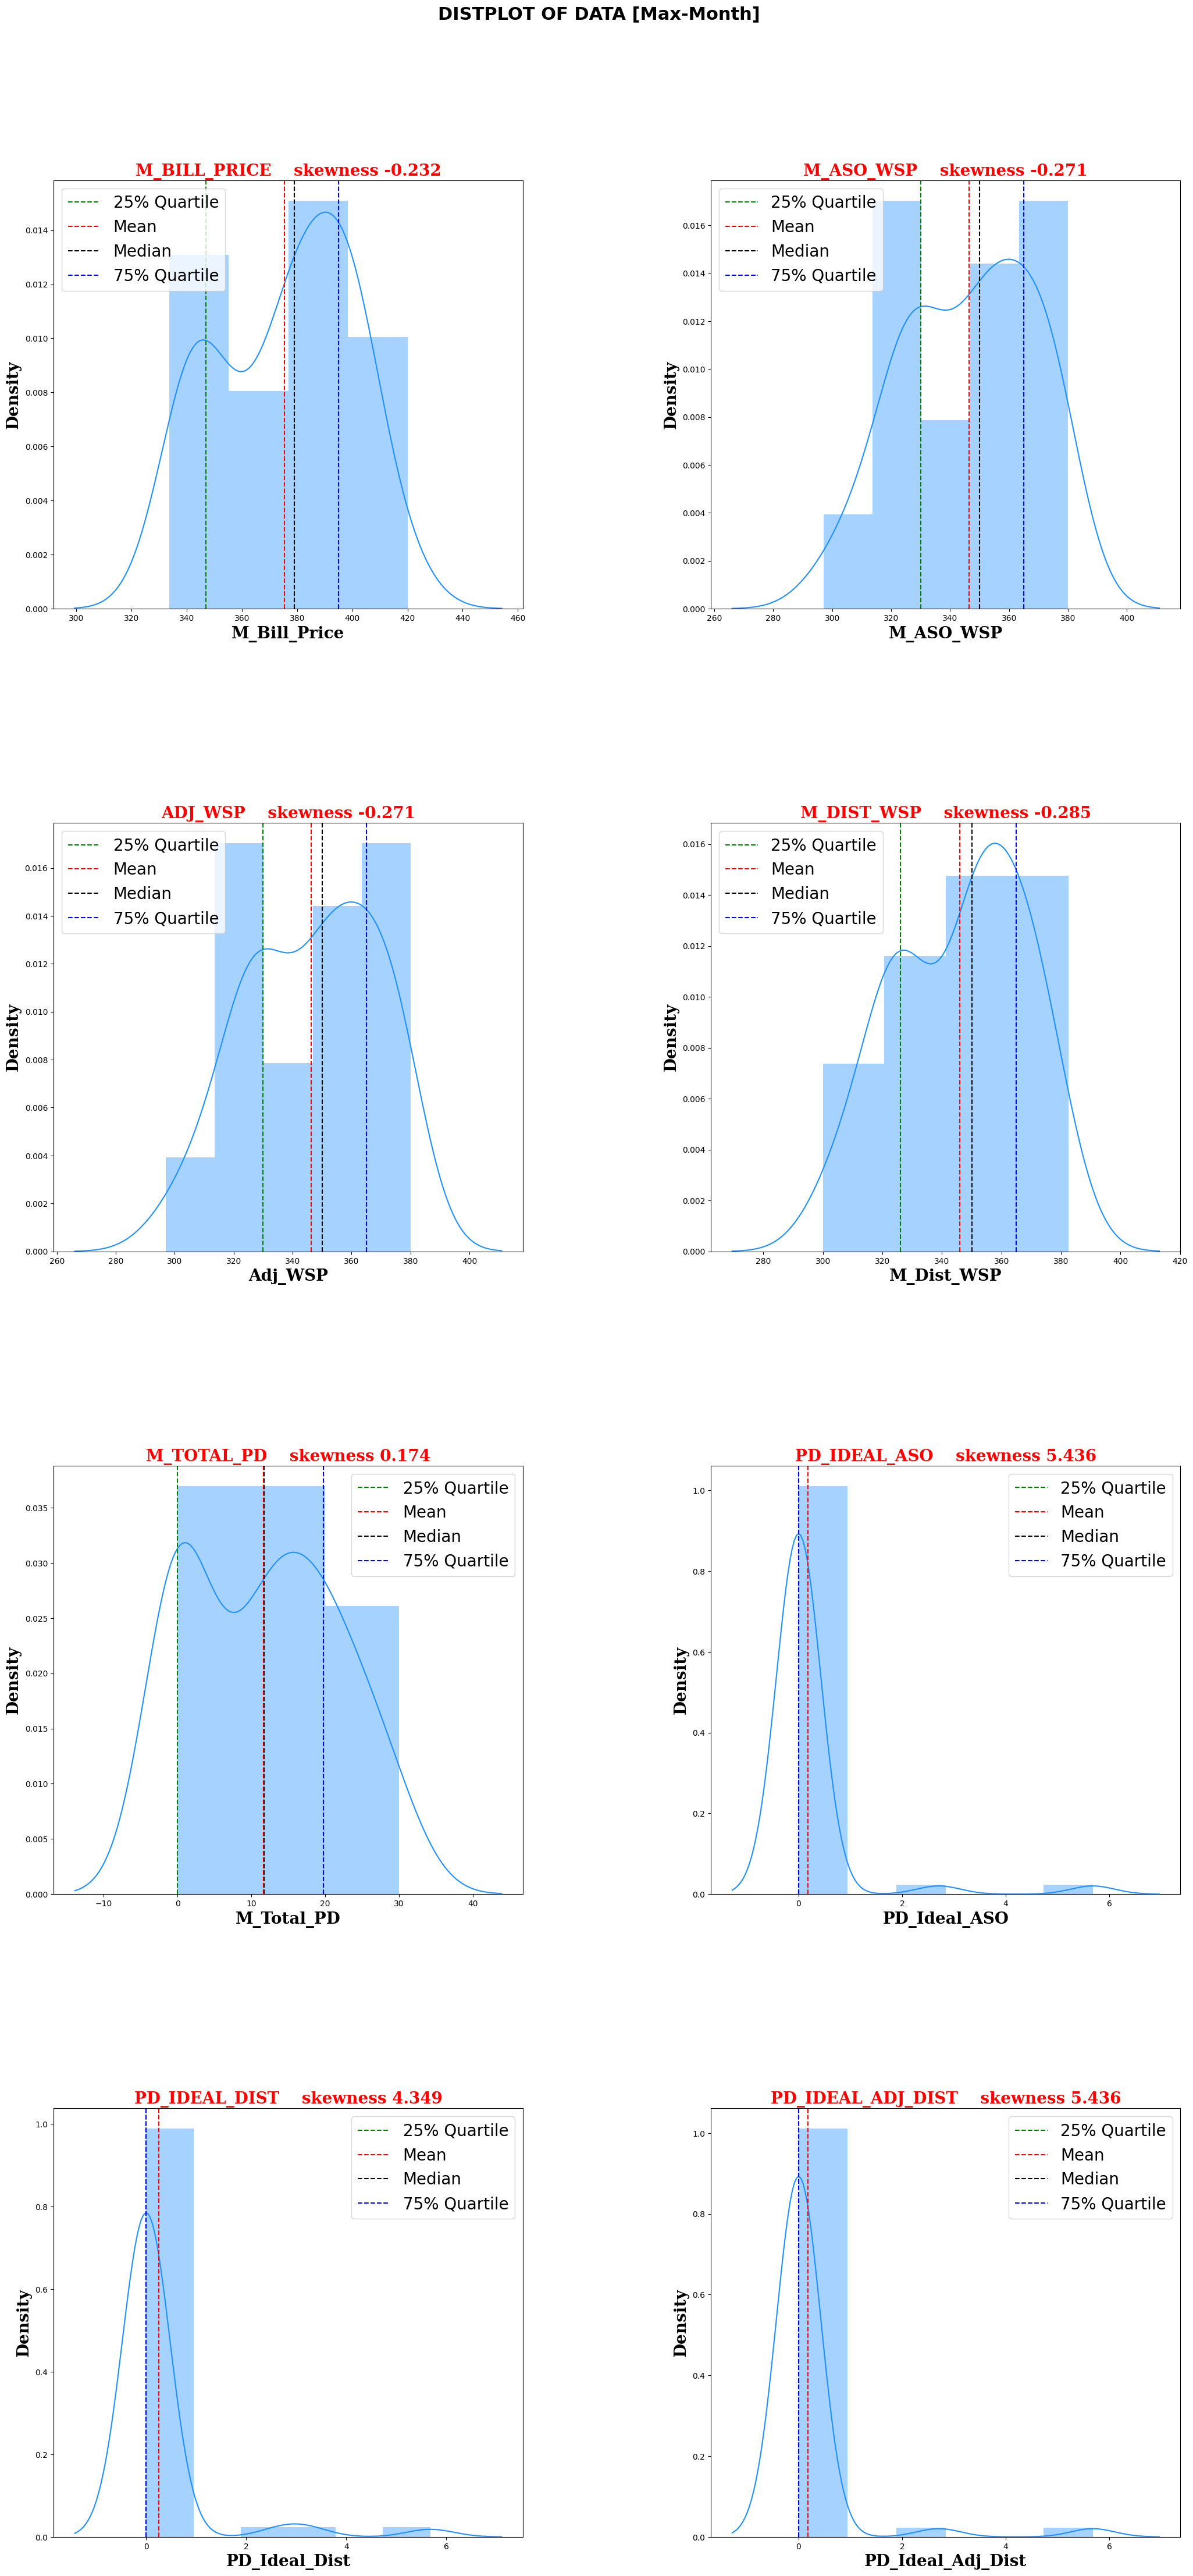

In [83]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[25,50])
fig.suptitle('DISTPLOT OF DATA [Max-Month]', fontsize=22, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Columns):
    ax = fig.add_subplot(4, 2, i+1)
    ax = sns.distplot(skew[col],  color='dodgerblue')
    ax.axvline(skew[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(skew[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(skew[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(skew[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_ylabel('Density', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}    skewness {round(skew[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=20) 

In [84]:
final1.head()

,Sales_Region,State,District,Month,Dealer_Levels,Record,Dealers_Counts,ASOs_Counts,Total_Month_Bill_Qty,M_Bill_Price,M_ASO_WSP,M_Dist_WSP,Adj_WSP,M_C-Dist_WSP,Discount/Bag,M_Total_PD,Cushion_Avl,Post_PD_BP,CD+QD,DF,CD+QD+DF,DDF_Actual,DDF%,DDF_Computed,BP-DDF,PD_Ideal_ASO,PD_Ideal_Dist,PD_Ideal_Adj_Dist,Excess_PD_ASO,Excess_PD_Dist,Excess_PD_Adj_Dist,Future_WSP,Savings_ASO,Savings_Dist,Savings_Adj_Dist,UPD Amount,DS-PD Amount
0,EAST,Bihar,BHAGALPUR,03'23,Silver,1.0,1.0,1.0,32.5,377.0000,360.0,352.5,360.0,372.5,168.767707,0.0,168.767707,377.0000,0.0,10.0,10.0,17.0000,0.100730,84.383854,292.616146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,EAST,Bihar,EAST CHAMPARAN,11'22,Silver,1.0,1.0,1.0,48.5,415.0000,375.0,375.0,375.0,375.0,68.643542,23.0,91.643542,392.0000,4.0,6.0,10.0,17.0000,0.247656,34.321771,380.678229,5.678229,5.678229,5.678229,17.321771,17.321771,17.321771,392.321771,16802.117734,16802.117734,16802.117734,22310.0,5507.882266
2,EAST,Bihar,GAYA,02'23,Gold,1.0,1.0,1.0,263.5,403.8531,375.0,377.5,375.0,NaN,573.102229,17.0,590.102229,386.8531,4.0,6.0,10.0,11.8531,0.020682,286.551115,117.301985,0.000000,0.000000,0.000000,17.000000,17.000000,17.000000,392.000000,89590.000000,89590.000000,89590.000000,89590.0,0.000000
3,EAST,Bihar,GAYA,09'22,Bronze,1.0,1.0,1.0,78.0,366.9514,330.0,332.5,330.0,NaN,485.092500,0.0,485.092500,366.9514,4.0,6.0,10.0,36.9514,0.076174,242.546250,124.405150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,330.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,EAST,Bihar,JAMUI,12'22,Gold,1.0,1.0,1.0,96.5,399.6000,370.0,377.5,370.0,367.5,357.114766,19.0,376.114766,380.6000,4.0,6.0,10.0,10.6000,0.029682,178.557383,221.042617,0.000000,0.000000,0.000000,19.000000,19.000000,19.000000,389.000000,36670.000000,36670.000000,36670.000000,36670.0,0.000000


In [85]:
final1['Savings_Adj_Dist'].sum()

1408746.5232421933

In [87]:
# final1[final1['Savings_Adj_Dist']>0]

In [90]:
import shutil
import os

source_file = "/DS & ML/KiESquareTemp/PD/PD_Model_Maximum_Adj-WSP_Max.ipynb"
destination_folder = path1+'/'
shutil.copy(source_file, destination_folder)
if os.path.exists(destination_folder + "PD_Model_Maximum_Adj-WSP_Max.ipynb"):
    print("Notebook saved successfully.")
else:
    print("Failed to save the notebook.")

FileNotFoundError: [Errno 2] No such file or directory: '/DS & ML/KiESquareTemp/PD/PD_Model_Maximum_Adj-WSP_Max.ipynb'